In [15]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Imports (VERY IMPORTANT)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
project_path = "/content/drive/MyDrive/ds_akarshitsingh"
csv_path = project_path + "/csv_files"


In [17]:
sentiment = pd.read_csv(f"{csv_path}/fear_greed.csv")
trades = pd.read_csv(f"{csv_path}/historical_data.csv", low_memory=False)

sentiment.head(), trades.head()


(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

In [18]:
# ---- CLEAN SENTIMENT DATA ----

# Convert UNIX timestamp to datetime
sentiment['timestamp'] = pd.to_datetime(sentiment['timestamp'], unit='s', errors='coerce')

# Create date-only column
sentiment['date'] = sentiment['timestamp'].dt.date

# Normalize sentiment labels
sentiment['classification'] = sentiment['classification'].str.title().str.strip()



# ---- CLEAN TRADER DATA ----

# Convert trader UNIX timestamp to datetime
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms', errors='coerce')

# Create date-only column
trades['date'] = trades['Timestamp'].dt.date


In [19]:
merged = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)

merged = merged.rename(columns={'classification': 'Sentiment'})
merged.head()



,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,Sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-10-27,Greed


In [20]:
merged['Sentiment'].value_counts(dropna=False)


,count
Sentiment,
Fear,133871
Greed,36289
NaN,26961
Neutral,7141
Extreme Greed,6962


In [21]:
merged.to_csv(f"{csv_path}/merged_data.csv", index=False)
print("Merged dataset saved!")


Merged dataset saved!


In [22]:
#EDA
print("Merged Dataset Shape:", merged.shape)
print("\nColumn Names:\n", merged.columns)

print("\nData Types:\n")
print(merged.dtypes)

print("\nMissing Values:\n")
print(merged.isnull().sum())


Merged Dataset Shape: (211224, 18)

Column Names:
 Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'Sentiment'],
      dtype='object')

Data Types:

Account                     object
Coin                        object
Execution Price            float64
Size Tokens                float64
Size USD                   float64
Side                        object
Timestamp IST               object
Start Position             float64
Direction                   object
Closed PnL                 float64
Transaction Hash            object
Order ID                     int64
Crossed                       bool
Fee                        float64
Trade ID                   float64
Timestamp           datetime64[ns]
date                        object
Sentiment                   object
dtype: object

Missing 

In [23]:
import os

output_path = f"{project_path}/outputs"

# Create outputs folder if it doesn't exist
os.makedirs(output_path, exist_ok=True)

print("Output folder ready:", output_path)


Output folder ready: /content/drive/MyDrive/ds_akarshitsingh/outputs


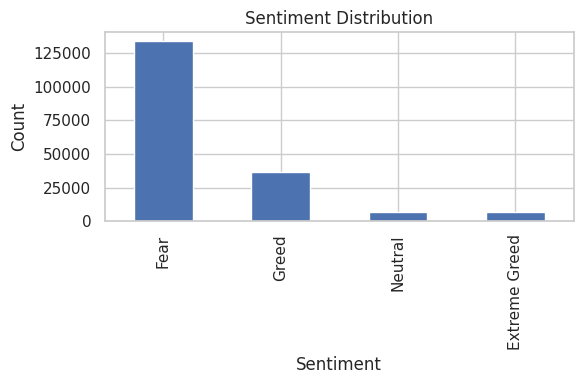

In [24]:
plt.figure(figsize=(6,4))
merged['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(f"{output_path}/sentiment_distribution.png")
plt.show()


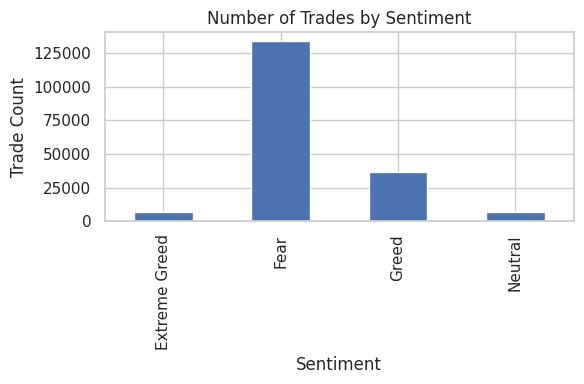

In [25]:
plt.figure(figsize=(6,4))
merged.groupby("Sentiment")['Account'].count().plot(kind='bar')
plt.title("Number of Trades by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Trade Count")
plt.tight_layout()
plt.savefig(f"{output_path}/trades_by_sentiment.png")
plt.show()


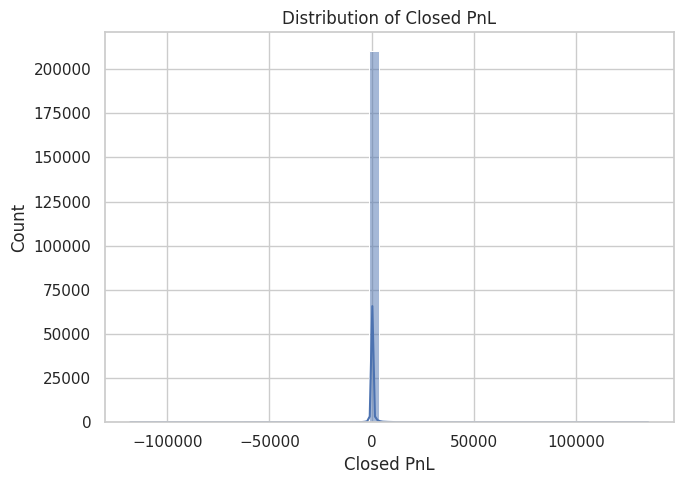

In [26]:
plt.figure(figsize=(7,5))
sns.histplot(merged['Closed PnL'], bins=50, kde=True)
plt.title("Distribution of Closed PnL")
plt.xlabel("Closed PnL")
plt.tight_layout()
plt.savefig(f"{output_path}/pnl_distribution.png")
plt.show()


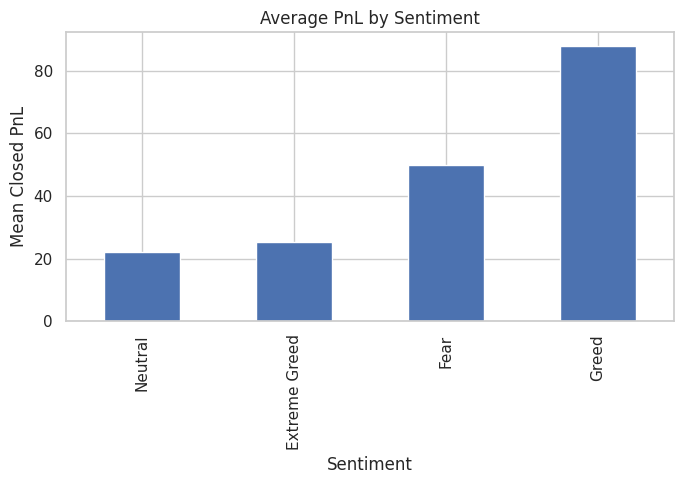

,Closed PnL
Sentiment,
Neutral,22.229713
Extreme Greed,25.418772
Fear,50.047622
Greed,87.894859


In [27]:
pnl_by_sentiment = merged.groupby("Sentiment")['Closed PnL'].mean().sort_values()

plt.figure(figsize=(7,5))
pnl_by_sentiment.plot(kind='bar')
plt.title("Average PnL by Sentiment")
plt.ylabel("Mean Closed PnL")
plt.tight_layout()
plt.savefig(f"{output_path}/avg_pnl_by_sentiment.png")
plt.show()

pnl_by_sentiment


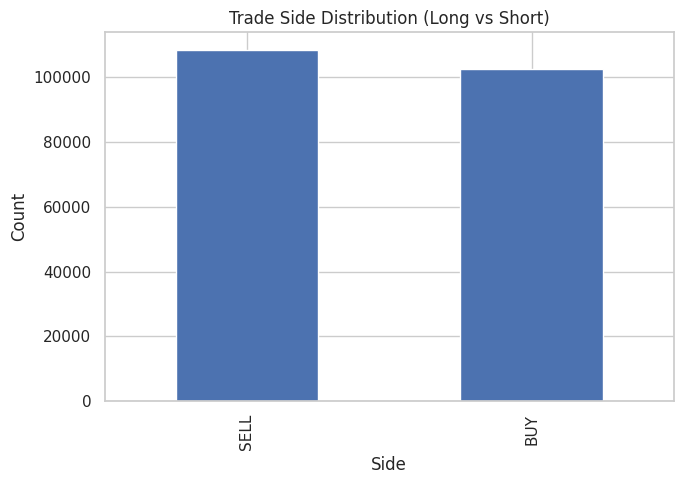

In [28]:
plt.figure(figsize=(7,5))
merged['Side'].value_counts().plot(kind='bar')
plt.title("Trade Side Distribution (Long vs Short)")
plt.xlabel("Side")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(f"{output_path}/side_distribution.png")
plt.show()


<Figure size 800x500 with 0 Axes>

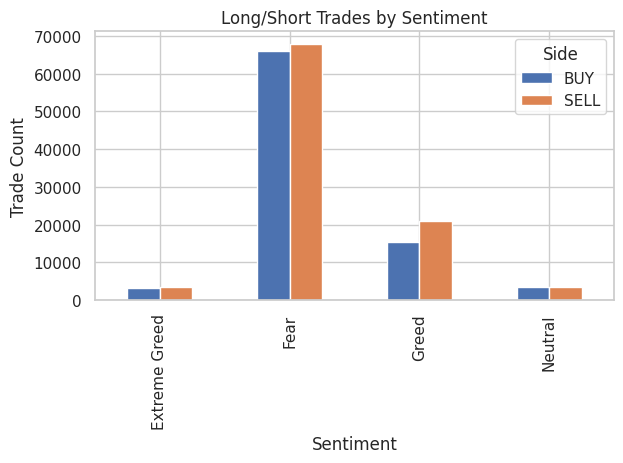

In [29]:
plt.figure(figsize=(8,5))
merged.groupby(['Sentiment','Side']).size().unstack().plot(kind='bar')
plt.title("Long/Short Trades by Sentiment")
plt.ylabel("Trade Count")
plt.tight_layout()
plt.savefig(f"{output_path}/long_short_by_sentiment.png")
plt.show()


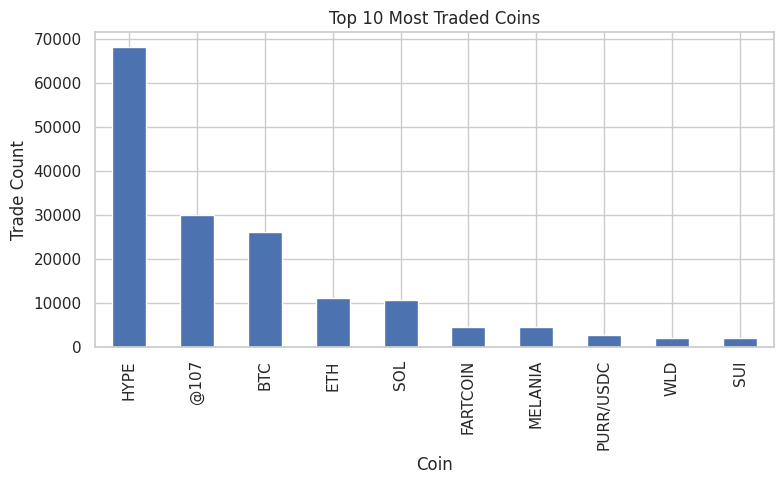

In [30]:
plt.figure(figsize=(8,5))
merged['Coin'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Traded Coins")
plt.xlabel("Coin")
plt.ylabel("Trade Count")
plt.tight_layout()
plt.savefig(f"{output_path}/top10_coins.png")
plt.show()


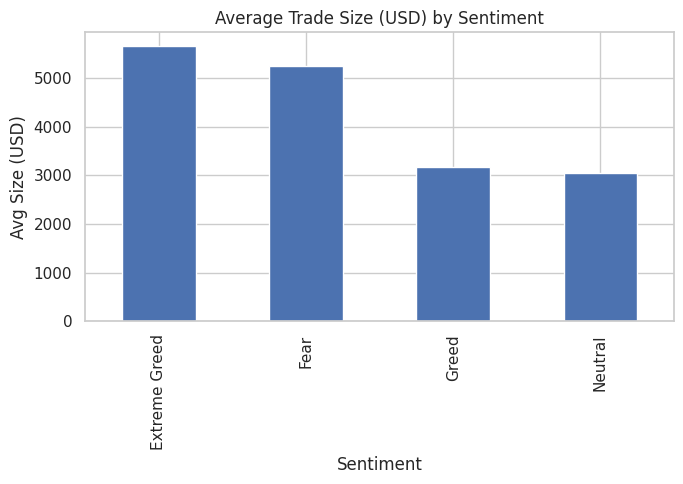

In [31]:
plt.figure(figsize=(7,5))
merged.groupby("Sentiment")['Size USD'].mean().plot(kind='bar')
plt.title("Average Trade Size (USD) by Sentiment")
plt.ylabel("Avg Size (USD)")
plt.tight_layout()
plt.savefig(f"{output_path}/avg_size_vs_sentiment.png")
plt.show()
